JPLSpec
====

The astroquery module JPLSpec provides functionalities to query the <a href="https://spec.jpl.nasa.gov/ftp/pub/catalog/catform.html"> JPL molecular spectral catalog </a> and access the metadata of this catalog. The query module imitates the catalog's online browser form and returns an astropy table with the results. What sets apart the JPL molecular spectral catalog from other catalogs is the availability of the partition functions at certain temperatures, from which the partition functions at other temperatures can be interpolated. Another useful thing about the JPL Spectral catalog is that the documentation includes straightforward derivations of other molecular constants using the data obtained from the catalog.  

The following examples show the query functionality of JPLSpec. This example queries the transition lines and molecular data of CO from frequencies 100-1000 GHz.

*The `molecule` parameter is the molecule you desire to search, which can be either be the catalog tag, the exact name, or a regex (for the regex search the parameter `parse_name_locally` has to be set to True, default is False)*


In [1]:
from astroquery.jplspec import JPLSpec
import astropy.units as u
from sbpy.data import Phys

In [2]:
response = JPLSpec.query_lines(min_frequency=100 * u.GHz, 
                               max_frequency=1000 * u.GHz, #cutoff frequencies of search, given in any unit of Hz
                               min_strength=-500, #minimum strength in catalog units, the default is -500
                               molecule= "28001 CO", #molecule identifier: the catalog species name
                               max_lines = 7) #max number of search results you want saved/shown

print(response)

    FREQ     ERR    LGINT   DR   ELO   GUP  TAG   QNFMT QN' QN"
    MHz      MHz   MHz nm2      1 / cm                         
----------- ------ ------- --- ------- --- ------ ----- --- ---
115271.2018 0.0005 -5.0105   2     0.0   3 -28001   101   1   0
   230538.0 0.0005 -4.1197   2   3.845   5 -28001   101   2   1
345795.9899 0.0005 -3.6118   2  11.535   7 -28001   101   3   2
461040.7682 0.0005 -3.2657   2 23.0695   9 -28001   101   4   3
576267.9305 0.0005 -3.0118   2 38.4481  11 -28001   101   5   4
691473.0763 0.0005 -2.8193   2 57.6704  13 -28001   101   6   5
 806651.806  0.005 -2.6716   2 80.7354  15 -28001   101   7   6


In the three examples below, a regular expression will be used as the molecular identifier to perform the query instead of the catalog species tag. I will explain with inline comments what the regular expression used does in each example.

In [3]:
response = JPLSpec.query_lines(min_frequency=100 * u.GHz, 
                               max_frequency=1000 * u.GHz,
                               min_strength=-500,
                               molecule= "CO$", #'$' ensures regex search only matches exactly 'CO' and not i.e.'CO2'
                               parse_name_locally=True, #in order to process the molecule parameter as a regex
                               max_lines = 7)

print(response)

    FREQ     ERR    LGINT   DR   ELO   GUP  TAG   QNFMT QN' QN"
    MHz      MHz   MHz nm2      1 / cm                         
----------- ------ ------- --- ------- --- ------ ----- --- ---
115271.2018 0.0005 -5.0105   2     0.0   3 -28001   101   1   0
   230538.0 0.0005 -4.1197   2   3.845   5 -28001   101   2   1
345795.9899 0.0005 -3.6118   2  11.535   7 -28001   101   3   2
461040.7682 0.0005 -3.2657   2 23.0695   9 -28001   101   4   3
576267.9305 0.0005 -3.0118   2 38.4481  11 -28001   101   5   4
691473.0763 0.0005 -2.8193   2 57.6704  13 -28001   101   6   5
 806651.806  0.005 -2.6716   2 80.7354  15 -28001   101   7   6


In [4]:
response1 = JPLSpec.query_lines(min_frequency=100 * u.GHz, 
                               max_frequency=500 * u.GHz,
                               min_strength=-500,
                               molecule= "^H.O$", #matches any word that starts with an H, ends with an O, and contains any character in between
                               parse_name_locally=True) #in order to process the molecule parameter as a regex

print(response1)

    FREQ     ERR    LGINT    DR    ELO    GUP  TAG   QNFMT   QN'      QN"   
    MHz      MHz   MHz nm2        1 / cm                                    
----------- ------ -------- --- --------- --- ------ ----- -------- --------
115542.5692 0.6588 -13.2595   3 4606.1683  35  18003  1404 17 810 0 18 513 0
 139614.293   0.15  -9.3636   3 3080.1788  87 -18003  1404 14 6 9 0 15 312 0
 177317.068   0.15 -10.3413   3 3437.2774  31 -18003  1404 15 610 0 16 313 0
 183310.087  0.001  -3.6463   3  136.1639   7 -18003  1404  3 1 3 0  2 2 0 0
 247440.096   0.15  -9.0097   3 2872.5806  29 -18003  1404 14 410 0 15 313 0
 259952.182    0.2   -8.669   3 2739.4286  27 -18003  1404 13 6 8 0 14 311 0
266574.0983 1.8473 -14.1089   3 5739.2279 129  18003  1404 21 417 0 20 714 0
289008.0871 2.7396 -15.1447   3 6167.7109 129  18003  1404 21 615 0 20 912 0
294805.1937 4.1586 -16.0382   3 6707.3362 135  18003  1404 22 716 0 23 419 0
 321225.677 0.0006  -5.0909   3 1282.9191  63 -18003  1404 10 2 9 0  9 3 6 0

In [5]:
response2 = JPLSpec.query_lines(min_frequency=100 * u.GHz, 
                               max_frequency=700 * u.GHz,
                               min_strength=-500,
                               molecule= "^H[2D]O(-\d\d|)$", #matches any H2O and HDO isotopes
                               parse_name_locally=True) #in order to process the molecule parameter as a regex

print(response2)

    FREQ      ERR    LGINT    DR    ELO    GUP  TAG   QNFMT   QN'      QN"   
    MHz       MHz   MHz nm2        1 / cm                                    
----------- ------- -------- --- --------- --- ------ ----- -------- --------
115542.5692  0.6588 -13.2595   3 4606.1683  35  18003  1404 17 810 0 18 513 0
 139614.293    0.15  -9.3636   3 3080.1788  87 -18003  1404 14 6 9 0 15 312 0
 177317.068    0.15 -10.3413   3 3437.2774  31 -18003  1404 15 610 0 16 313 0
 183310.087   0.001  -3.6463   3  136.1639   7 -18003  1404  3 1 3 0  2 2 0 0
 247440.096    0.15  -9.0097   3 2872.5806  29 -18003  1404 14 410 0 15 313 0
 259952.182     0.2   -8.669   3 2739.4286  27 -18003  1404 13 6 8 0 14 311 0
266574.0983  1.8473 -14.1089   3 5739.2279 129  18003  1404 21 417 0 20 714 0
289008.0871  2.7396 -15.1447   3 6167.7109 129  18003  1404 21 615 0 20 912 0
294805.1937  4.1586 -16.0382   3 6707.3362 135  18003  1404 22 716 0 23 419 0
 321225.677  0.0006  -5.0909   3 1282.9191  63 -18003  1404 10 2

Some columns are automatically outputted as ``astropy.units.quantity`` type, this means that they are values with assigned units and through the functionalities of ``astropy.units`` they can be manipulated. The units of the columns of the query can be displayed by calling ``response.info``, where ``response`` is what you named your results from the query:

In [6]:
print(response.info) #print metadata of Frequency column from response query

<Table length=7>
 name  dtype    unit 
----- ------- -------
 FREQ float64     MHz
  ERR float64     MHz
LGINT float64 MHz nm2
   DR   int64        
  ELO float64  1 / cm
  GUP   int64        
  TAG   int64        
QNFMT   int64        
  QN'   int64        
  QN"   int64        



Having this information comes in handy for converting to other units easily, an example using the data queried from above is shown below:

In [7]:
convert = response['FREQ'].to('GHz') #draws out the first frequency found in 'FREQ' column and converts to GHz

print(convert)

[115.2712018 230.538     345.7959899 461.0407682 576.2679305 691.4730763
 806.651806 ] GHz


Partition Functions
------------------

Obtaining the partition functions at certain temperatures for a specific molecule is possible with a search in one of the catalog's files: `catdir.cat`, which is installed locally along with the package. 

The resulting partition functions are found under the `QLOG#` results.

To find a certain molecule one can use `astropy.Table` indexing, one can search by exact tag number (i.e. 28001) or by ASCII name of the species (i.e. 'CO')

The following examples show how to access and search for a molecule in this catalog file, and even how to access metadata to find out the temperature for a specific partition function of interest.

In [8]:
cat = JPLSpec.get_species_table() 

mol = cat[cat['NAME'] == 'H2O'] #saving information only for a specific molecule of interest using ASCII Name

print(mol)

temp = mol['QLOG1'].meta #access the temperature of the partition function of interest from the column metadata

print(temp)

 TAG  NAME NLINE QLOG1  QLOG2  QLOG3 QLOG4  QLOG5  QLOG6  QLOG7  VER
----- ---- ----- ------ ------ ----- ------ ------ ------ ------ ---
18003  H2O  1376 2.2507 2.0645 1.804 1.3649 0.9335 0.4819 0.0994  6*
{'Temperature (K)': 300}


This is a key functionality of JPLSpec, since the  partition functions are readily accessible. Through curve-fitting/interpolation, the partition functions can be calculated at any temperature, as seen below:

In [9]:
temp = cat.meta['Temperature (K)'] #obtain the list of all available temperatures from the table metadata

part = list(mol['QLOG1','QLOG2','QLOG3', 'QLOG4', 'QLOG5','QLOG6',
                'QLOG7'][0]) #obtain the list of partition functions from the table results

import numpy as np
from scipy.optimize import curve_fit #or your fitting algorithm of preference (interp1d works too)

def f(T,a):#model function for nonlinear molecules like in our case: H2O
    return np.log10(a*T**(1.5)) #for linear molecules, the dependence is expected to be linear in the log scale.

param, cov = curve_fit(f,temp,part,bounds=(0.00001, np.inf)) #this is all scipy.optimize: performs the fit & returns parameters and covariance

part160 = 10**(f(160.,param[0])) #partition function at temp = 160 with the new fit parameters; get rid of log base 10. 

print(part160) 


74.41721685721285


You can also give a range to the function and plot your partition function and its curve fit:

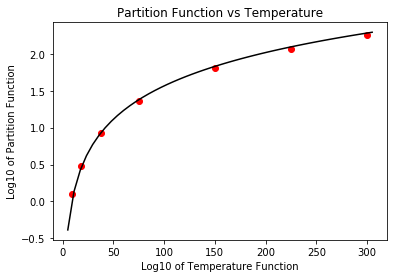

In [10]:
import matplotlib.pyplot as plt #for plotting

tl = np.linspace(5,305) #set up a range of x values, Temperatures in this case. 
pl = f(tl,param[0]) #obtain partition function values for each temperature given. 
plt.scatter(temp,part,c='r') #plot a scaterplot of the original data
plt.plot(tl,pl,'k') #plot the curve fit on top of the data
plt.title('Partition Function vs Temperature') #name the graph
plt.xlabel('Log10 of Temperature Function') #labels
plt.ylabel('Log10 of Partition Function')
plt.show()

This astroquery module is useful for the calculations of values such as the production rates in sbpy. The `sbpy.data.Phys` function from_jplspec is used to extract data from this module and add it into an sbpy data frame for further use. The following example shows how this works:

In [11]:
temp_estimate = 47. * u.K # kinetic temperature

mol_tag = 28001 # JPLSpec unique identifier

transition_freq = (345.7 * u.GHz).to('MHz') # Transition frequency

mol_data = Phys.from_jplspec(temp_estimate, transition_freq, mol_tag) # build Phys object

Once the phys object has been created, one can access all the information given by `astroquery.jplspec` as well as the partition function at the desired temperature:

In [12]:
print(mol_data['elo_j']) # print energy of lower level
print(mol_data['degfr']) # print degrees of freedom
print(mol_data['partfn']) # print interpolated partition function at desired temp

[2.29136526e-22] J
degfreedom
----------
         2
      partfn     
-----------------
17.05551276908476


Regular expressions can also be used as molecule identifiers since `astroquery.jplspec` provides the functionality. 
It is important to understand regular expressions and how to use them in a way that gets the user exactly what they
want. If the user is unfamiliar with regular expressions, using the JPL Spectral catalog unique identifier is
the best course of action. 

Hint: in regular expressions, putting something between '^' and '\$' will match the 
literal text in between. This is useful to remember in order to avoid matching unnecessary terms.
i.e. using 'co' will match 'co', 'co2', 'hco' so you would want to input '^co$' to avoid such nuances

In [13]:
mol_tag = '^CO$'

mol_data = Phys.from_jplspec(temp_estimate, transition_freq, mol_tag) # build Phys object

print(mol_data['elo_j']) # print energy of lower level
print(mol_data['degfr']) # print degrees of freedom
print(mol_data['partfn']) # print interpolated partition function at desired temp

[2.29136526e-22] J
degfreedom
----------
         2
      partfn     
-----------------
17.05551276908476
